In [13]:
import pandas as pd
import numpy as np
import torch.nn as nn
import lightning.pytorch as pl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from torch.utils.data import DataLoader, ConcatDataset
from dataset import BdzDataset
from model import LitMLP
from viz_utils import *
sns.set_theme()

In [8]:
@torch.no_grad()
def init_weights(m, std):
     if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=std)
stds = np.linspace(1, 4, 10)

In [11]:
model = LitMLP(input_dim=39,
               output_dim=2,
               lr=0.1,
               nesterov=False,
               momentum=0,
               opt="BFGS"
)

init_weights(model, stds[0])

In [20]:
# KFOLD VALIDATION

dtf = pd.read_csv('data/fsdata.csv')
train, test = np.split(dtf.sample(frac=1), [int(.7 * len(dtf))])
train = BdzDataset(x=train.drop('class', axis=1), y=train['class'])
test = BdzDataset(x=test.drop('class', axis=1), y=test['class'])
dataset = ConcatDataset([train, test])

kfold = KFold(n_splits=10, shuffle=True)
loss_fn = nn.CrossEntropyLoss()

In [26]:
num_epochs = 150
loss_hist = {
    'train': [],
    'test': []
}
x_train, y_train = train[:]
x_test, y_test = test[:]


for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    

    trainloader = torch.utils.data.DataLoader(
                      dataset, 
                      batch_size=train_subsampler.__len__(), sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=test_subsampler.__len__(), sampler=test_subsampler)
    
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
    for epoch in range(0, num_epochs):
        print(f'Starting epoch {epoch+1}')
        current_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, targets = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            loss.backward()
            optimizer.step()
            current_loss += loss.item()
            if i % 100 == 99:
                print('Loss after mini-batch %5d: %.3f' %(i + 1, current_loss / 100))
                current_loss = 0.0
    
    pred = model(x_train)
    loss_t = loss_fn(pred, y_train)
    pred = model(x_test)
    loss_test = loss_fn(pred, y_test)
    loss_hist['train'].append(loss_t.item())
    loss_hist['test'].append(loss_test.item())
    print('Training process has finished. Saving trained model.')

FOLD 0
--------------------------------
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52
Starting epoch 53
Starting epoch 

Starting epoch 138
Starting epoch 139
Starting epoch 140
Starting epoch 141
Starting epoch 142
Starting epoch 143
Starting epoch 144
Starting epoch 145
Starting epoch 146
Starting epoch 147
Starting epoch 148
Starting epoch 149
Starting epoch 150
Training process has finished. Saving trained model.
FOLD 3
--------------------------------
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Sta

Starting epoch 122
Starting epoch 123
Starting epoch 124
Starting epoch 125
Starting epoch 126
Starting epoch 127
Starting epoch 128
Starting epoch 129
Starting epoch 130
Starting epoch 131
Starting epoch 132
Starting epoch 133
Starting epoch 134
Starting epoch 135
Starting epoch 136
Starting epoch 137
Starting epoch 138
Starting epoch 139
Starting epoch 140
Starting epoch 141
Starting epoch 142
Starting epoch 143
Starting epoch 144
Starting epoch 145
Starting epoch 146
Starting epoch 147
Starting epoch 148
Starting epoch 149
Starting epoch 150
Training process has finished. Saving trained model.
FOLD 6
--------------------------------
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Start

Starting epoch 106
Starting epoch 107
Starting epoch 108
Starting epoch 109
Starting epoch 110
Starting epoch 111
Starting epoch 112
Starting epoch 113
Starting epoch 114
Starting epoch 115
Starting epoch 116
Starting epoch 117
Starting epoch 118
Starting epoch 119
Starting epoch 120
Starting epoch 121
Starting epoch 122
Starting epoch 123
Starting epoch 124
Starting epoch 125
Starting epoch 126
Starting epoch 127
Starting epoch 128
Starting epoch 129
Starting epoch 130
Starting epoch 131
Starting epoch 132
Starting epoch 133
Starting epoch 134
Starting epoch 135
Starting epoch 136
Starting epoch 137
Starting epoch 138
Starting epoch 139
Starting epoch 140
Starting epoch 141
Starting epoch 142
Starting epoch 143
Starting epoch 144
Starting epoch 145
Starting epoch 146
Starting epoch 147
Starting epoch 148
Starting epoch 149
Starting epoch 150
Training process has finished. Saving trained model.
FOLD 9
--------------------------------
Starting epoch 1
Starting epoch 2
Starting epoch 3
S

Text(0.5, 1.0, 'train')

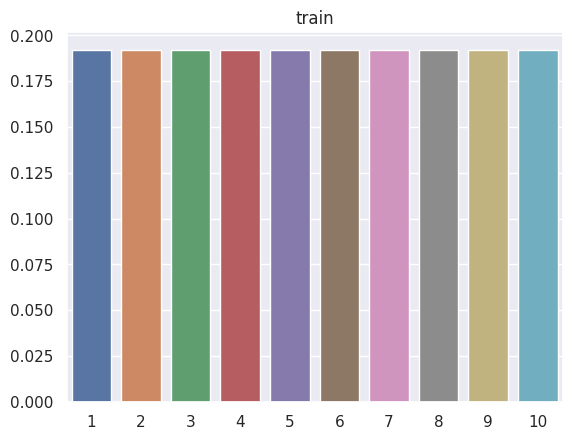

In [29]:
sns.barplot(x=list(range(1, 11)), y=loss_hist['train']).set_title('train')

Text(0.5, 1.0, 'test')

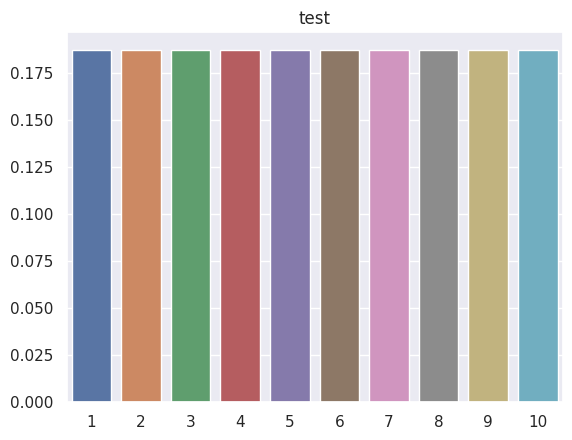

In [30]:
sns.barplot(x=list(range(1, 11)), y=loss_hist['test']).set_title('test')